In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('C:/Users/Preston Wong/Downloads/adult.csv', index_col = False)
df = df.dropna(axis=0)
onehot = pd.get_dummies(data=df, columns=['Column2','Column4', 'Column6', 'Column7','Column8', 'Column9', 'Column10', 'Column14'],
                        drop_first = True)

,Column1,Column3,Column5,Column11,Column12,Column13,Column15,Column2_ Federal-gov,Column2_ Local-gov,Column2_ Never-worked,...,Column14_ Portugal,Column14_ Puerto-Rico,Column14_ Scotland,Column14_ South,Column14_ Taiwan,Column14_ Thailand,Column14_ Trinadad&Tobago,Column14_ United-States,Column14_ Vietnam,Column14_ Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37.0,284582.0,14.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49.0,160187.0,5.0,0.0,0.0,16.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52.0,209642.0,9.0,0.0,0.0,45.0,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31.0,45781.0,14.0,14084.0,0.0,50.0,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42.0,159449.0,13.0,5178.0,0.0,40.0,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
onehot = onehot.drop(['Column15'], axis=1)

In [4]:
df = onehot.join(df['Column15'])
df = df.dropna(axis=1)
df = df[df.notnull()]

In [7]:
X_and_Y = df.as_matrix()
np.random.shuffle(X_and_Y)
X_and_Y = X_and_Y[:5000, :101]
X = X_and_Y[:, 0:-1]
Y = X_and_Y[:, -1]
print(X_and_Y.shape, X.shape, Y.shape)

(5000, 101) (5000, 100) (5000,)


In [8]:
#change to binary classification
for i in range(len(Y)):
    if Y[i] == ' >50K':
        Y[i] = 1
    else:
        Y[i] = 0

In [9]:
print(Y[:200])

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]


In [10]:
depth_list = []
for i in range(1, 21, 1):
    depth_list.append(i)
print(depth_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [11]:
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
params = {'max_depth':depth_list}
grid_search = GridSearchCV(classifier, params, return_train_score = True, cv=5)

In [12]:
def draw_heatmap_linear(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [13]:
Y = Y.astype('int')
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  

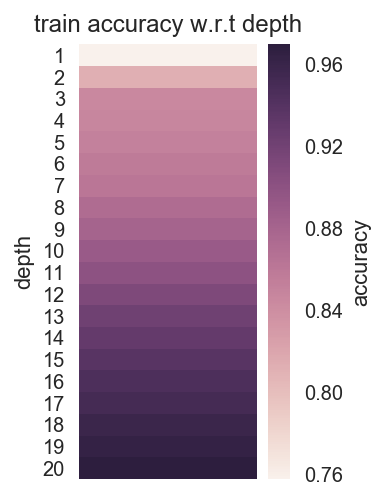

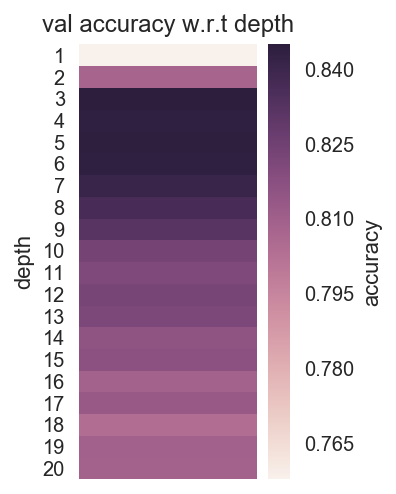

In [14]:
grid_search.fit(X_train_val, Y_train_val)
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [15]:
test_acc = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc)
tot_train = (sum(train_acc)/len(train_acc))
print(tot_train)
tot_val = (sum(val_acc)/len(val_acc))
print(tot_val)

{'max_depth': 3}
0.851
[ 0.89355283]
[ 0.8209]


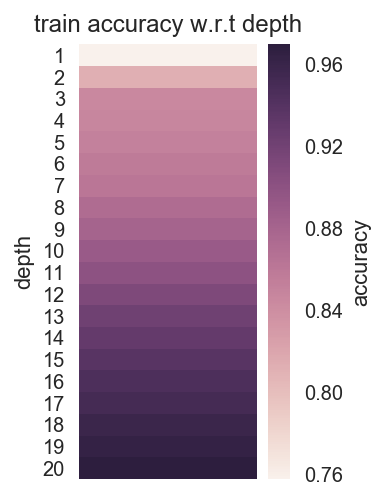

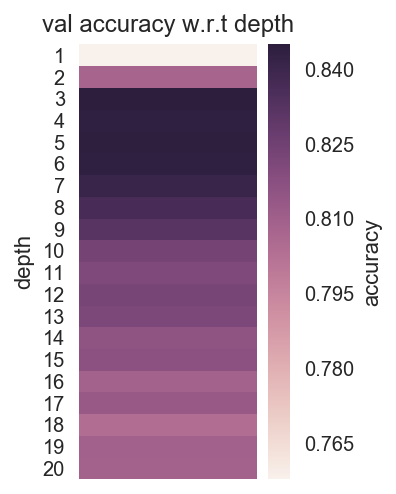

In [16]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc2 = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc2 = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [17]:
test_acc2 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc2)
tot_train2 = (sum(train_acc2)/len(train_acc2))
print(tot_train2)
tot_val2 = (sum(val_acc2)/len(val_acc2))
print(tot_val2)

{'max_depth': 5}
0.8512
[ 0.90409473]
[ 0.82502]


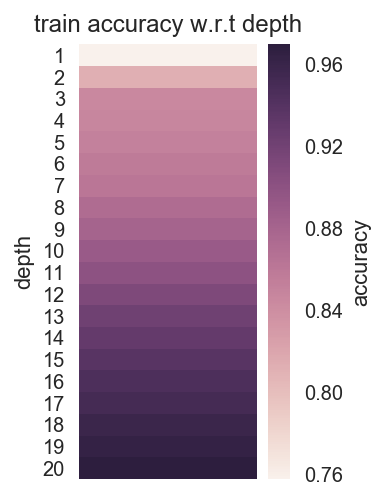

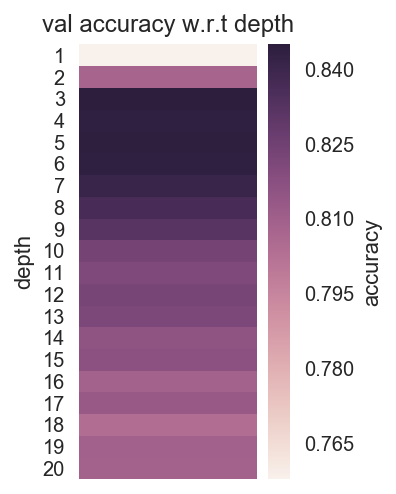

In [18]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc3 = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc3 = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [19]:
test_acc3 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc3)
tot_train3 = (sum(train_acc3)/len(train_acc3))
print(tot_train3)
tot_val3 = (sum(val_acc3)/len(val_acc3))
print(tot_val3)

{'max_depth': 6}
0.81775
[ 0.91130129]
[ 0.8115]


In [20]:
avg_test = (test_acc + test_acc2 + test_acc3)/3
avg_train = sum(tot_train + tot_train2 + tot_train3)/3
avg_val = sum(tot_val + tot_val2 + tot_val3)/3
print(avg_test, avg_train, avg_val)

0.839983333333 0.902982949351 0.81914
